In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import  Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow

### Data Perparation


In [2]:
x = pd.read_csv('fashion-mnist_train.csv')

In [3]:
x.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784


In [16]:
X_ = x.values
X = X_[:,1:]/255.0
y = X_[:,0]
print(X.shape,y.shape)

(60000, 784) (60000,)


In [17]:
np.unique(y,return_counts=True)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [18]:
X_train = X.reshape((-1,28,28,1))
Y_train = np_utils.to_categorical(y)

In [19]:
X_train.shape,Y_train.shape

((60000, 28, 28, 1), (60000, 10))

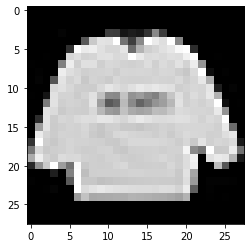

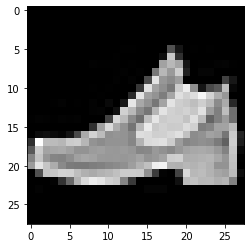

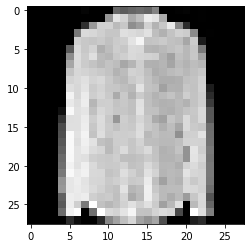

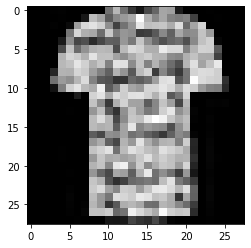

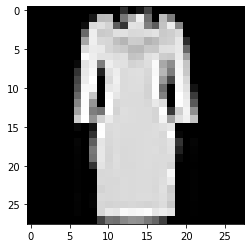

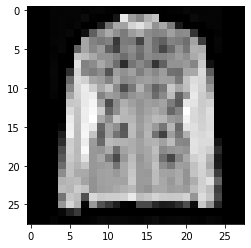

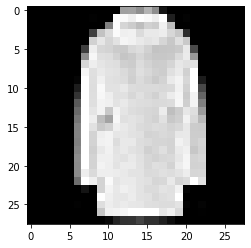

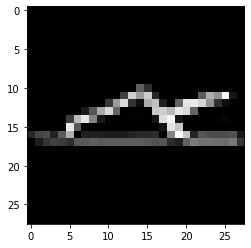

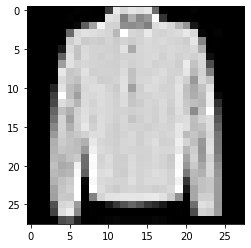

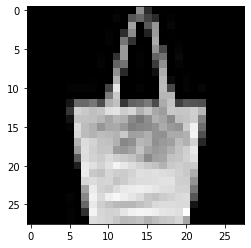

In [20]:
for i in range(10):
    plt.imshow(X_train[i].reshape((28,28)),cmap='gray')
    plt.show()

## CNN classifier

In [21]:
model = Sequential()

In [23]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation='relu'))
model.add(Convolution2D(8,(5,5),activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           6408      
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

In [25]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
hist = model.fit(X_train,Y_train,epochs=20,shuffle=True,batch_size=256,validation_split=0.20)

Epoch 1/20
188/188 [==============================] - 54s 287ms/step - loss: 0.8197 - accuracy: 0.7003 - val_loss: 0.5484 - val_accuracy: 0.8153

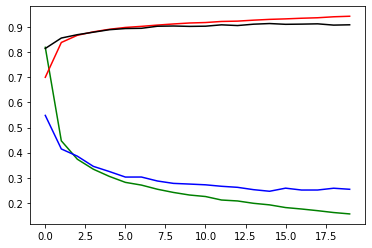

In [27]:
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')

plt.plot(hist.history['accuracy'],'r')
plt.plot(hist.history['val_accuracy'],'black')
plt.show()